In [27]:
import numpy as np
import pandas as pd
import cv2
import os

In [51]:
img_label_file = "data/labels.csv"

labels_csv = pd.read_csv(img_label_file, index_col=0)
labels = labels_csv.loc["fall-01"]
label_1 = labels.loc[labels["frame"] == 1]
label_1.label

AttributeError: 'Series' object has no attribute 'value'

In [68]:
### Read in the data
img_data_dir = "data/imgs/" # replace with your own dir if necessary
img_label_file = "data/labels.csv"

## Given an image name, extracts the label from the labels.csv file. True if 1 False if -1
def extract_label(file_name):
    split = file_name.split("-") # split image name
    fall_name = split[0] + "-" + split[1] # reconstruct fall name
    frame = int(split[-1].split(".")[0]) # end of split is like 113.png. removes .png part
    fall_labels = labels_csv.loc[fall_name]
    frame_label = fall_labels.loc[fall_labels["frame"] == frame]
    return int(frame_label.label) > 0

### Loads in the data from images and stores it in an array. Order is important because 
### The labels are in the same order as the images are appended to the array
def load_img_data():
    imgs = []
    labels = []
    labels_csv = pd.read_csv(img_label_file)
    
    # Iterates through fall folders and the frames within each fall
    for img_folder in os.listdir(img_data_dir):
        path = os.path.join(img_data_dir,img_folder)
        if ("fall" in path):
            for file in os.listdir(path):
                img = cv2.imread(os.path.join(path, file))
                imgs.append(img)
                labels.append([extract_label(file)])
                
    return imgs, labels

In [69]:
images, labels = load_img_data()

In [62]:
print(len(images), len(labels))

3931 3931


In [63]:
print(images[0])

[[[162 162 162]
  [161 161 161]
  [162 162 162]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[161 161 161]
  [160 160 160]
  [161 161 161]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[161 161 161]
  [160 160 160]
  [162 162 162]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[154 154 154]
  [154 154 154]
  [154 154 154]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[154 154 154]
  [154 154 154]
  [154 154 154]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[154 154 154]
  [154 154 154]
  [154 154 154]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


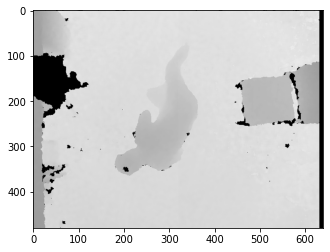

In [64]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [67]:
print(labels)

[[False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], 